In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_json('image-data.json')
df.head()

,artists,comments,faves,image_paths,image_urls
0,get-sherlock,22,142,[full/c11741fda71c47368b3ecc42de439de62c48cf30...,[https://images-wixmp-ed30a86b8c4ca887773594c2...
1,hoo0,393,"4,999",[full/fe76954198d74dd3a3fac890216d7f256172132b...,[https://images-wixmp-ed30a86b8c4ca887773594c2...
2,WuLiao-Yuzi,69,"2,110",[full/ba47403c06820d230acd79405fb8f1cf1e58c6fe...,[https://images-wixmp-ed30a86b8c4ca887773594c2...
3,403shiomi,48,490,[full/6c05caa5b126250613307f70e506f07f1e2513c3...,[https://images-wixmp-ed30a86b8c4ca887773594c2...
4,Joe-Roberts,72,949,[full/071c38ac67037aca590719c02d623a41b100c17e...,[https://images-wixmp-ed30a86b8c4ca887773594c2...


In [3]:
#convert faves and comments to int
df['faves'] = df['faves'].str.replace(',', '').astype(int)
df['comments'] = df['comments'].str.replace(',', '').astype(int)

In [7]:
#look at top 15 artists sorted by total number of favorites and comments
#number of images within the database
df.groupby('artists').agg({'faves':sum,
                           'comments': 'sum',
                           'image_urls':'count',
                          }).sort_values(by=['faves','comments','image_urls'], ascending=False).head(15)


,faves,comments,image_urls
artists,,,
AmandaTolleson,37283,3800,10
hoo0,17313,885,3
maXKennedy,13473,1552,15
alicexz,13069,797,1
sakimichan,10924,451,1
xanseviera,8892,455,3
sandara,8745,497,1
teralilac,7089,682,6
mlcamaro,6991,202,3


In [32]:
from skimage.transform import resize
import matplotlib.image as mpimg

#create empty image lists
image_resized_lst = []
image_original_lst = []

#height and width of resized image
new_height = 250
new_width = 250


#image loading has to be done one-by-one to ensure that the images are loaded in the corresponding order to the
#data collected in the dataframe
for i in range(len(df)):
    my_dir = 'DA-images/'
    img_path = df['image_paths'][i][0]
    #load image
    img = mpimg.imread(my_dir + img_path)
    image_original_lst.append(img)
    #resize image
    img_resized = resize(img,(new_height,new_width),
                        mode='constant', anti_aliasing=True, anti_aliasing_sigma=None)
    image_resized_lst.append(img_resized)
    
original_arr = np.array(image_original_lst)
resized_arr = np.array(image_resized_lst)

In [34]:
print(f"Original images array shape: {original_arr.shape}\nResized images array shape: {resized_arr.shape}")

Original images array shape: (385,)
Resized images array shape: (385, 250, 250, 3)


Text(0,0.5,'Images Resized')

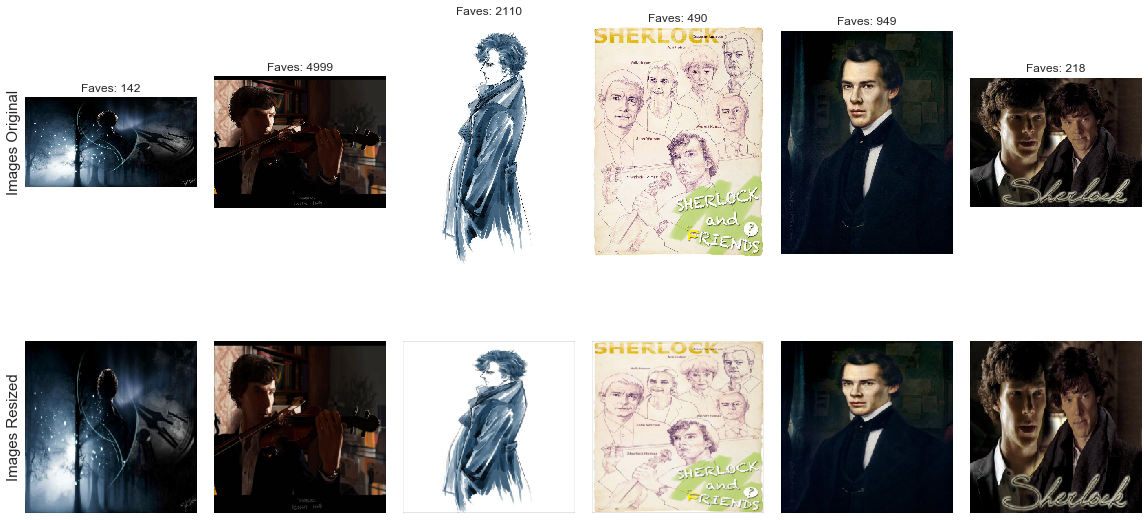

In [42]:
#peak at the resized images vs original images
fig, ax = plt.subplots(2, 6, figsize=(20, 10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(6):
    ax[0, i].imshow(original_arr[i])
    ax[1, i].imshow(resized_arr[i])
    ax[0, i].set_title(f"Faves: {df.faves[i]}")
    
ax[0, 0].set_ylabel('Images Original',size=15)
ax[1, 0].set_ylabel('Images Resized',size=15)

In [137]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasRegressor

input_shape = (250,250,3)

def baseline_model():
    # create model
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [138]:
# build regression estimator
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=20, verbose=1)

In [140]:
from sklearn.model_selection import train_test_split

X = resized_arr
y = np.array(df['faves'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

estimator.fit(X_train, y_train)

Epoch 1/100
308/308 [==============================] - 35s 114ms/step - loss: 2390280.4302
Epoch 2/100
308/308 [==============================] - 23s 73ms/step - loss: 2344071.7476
Epoch 3/100
308/308 [==============================] - 22s 70ms/step - loss: 2237138.3758
Epoch 4/100
308/308 [==============================] - 20s 66ms/step - loss: 2169342.9131
Epoch 5/100
308/308 [==============================] - 23s 75ms/step - loss: 2143402.8551
Epoch 6/100
308/308 [==============================] - 20s 65ms/step - loss: 2092214.2561
Epoch 7/100
308/308 [==============================] - 20s 66ms/step - loss: 2080817.2846
Epoch 8/100
308/308 [==============================] - 21s 68ms/step - loss: 2036760.8194
Epoch 9/100
308/308 [==============================] - 21s 69ms/step - loss: 1956534.6429
Epoch 10/100
308/308 [==============================] - 23s 75ms/step - loss: 1924214.5674
Epoch 11/100
308/308 [==============================] - 22s 72ms/step - loss: 1928043.7027
Epoch 1

Epoch 92/100
308/308 [==============================] - 22s 71ms/step - loss: 58238.4095
Epoch 93/100
308/308 [==============================] - 22s 73ms/step - loss: 66660.7973
Epoch 94/100
308/308 [==============================] - 22s 71ms/step - loss: 64956.3848
Epoch 95/100
308/308 [==============================] - 22s 70ms/step - loss: 58160.7716
Epoch 96/100
308/308 [==============================] - 22s 73ms/step - loss: 50704.2290
Epoch 97/100
308/308 [==============================] - 23s 74ms/step - loss: 43091.0886
Epoch 98/100
308/308 [==============================] - 22s 72ms/step - loss: 63257.4714
Epoch 99/100
308/308 [==============================] - 22s 72ms/step - loss: 65920.7831
Epoch 100/100
308/308 [==============================] - 23s 74ms/step - loss: 75931.6984


308/308 [==============================] - 3s 10ms/step
Explained variance score: 0.9806074053241354
Mean absolute score: 132.16494988466238


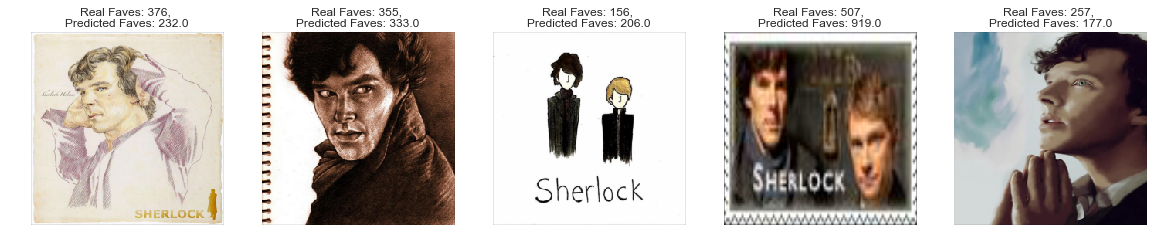

In [143]:
prediction = estimator.predict(X_train)

plt.figure(figsize=(20,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Real Faves: {y_train[i]}, \nPredicted Faves: {np.floor(prediction[i])}")
    plt.imshow(X_train[i])
    
print(f"Explained variance score: {explained_variance_score(y_train, prediction)}")
print(f"Mean absolute score: {mean_absolute_error(y_train, prediction)}")

77/77 [==============================] - 1s 10ms/step
Explained variance score: -0.04686966693780792
Mean absolute score: 901.4784285310027


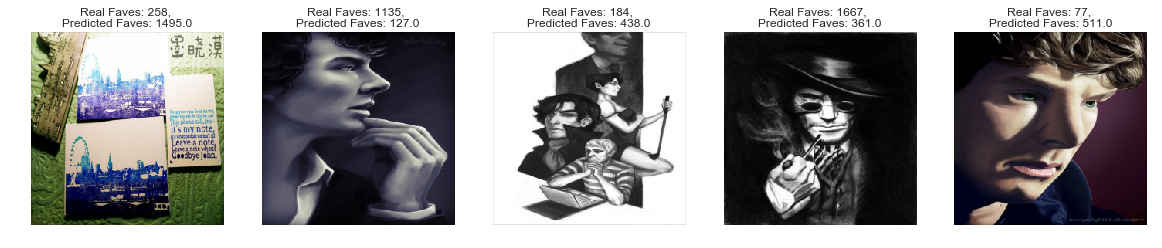

In [144]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

prediction = estimator.predict(X_test)

plt.figure(figsize=(20,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Real Faves: {y_test[i]}, \nPredicted Faves: {np.floor(prediction[i])}")
    plt.imshow(X_test[i])
    
print(f"Explained variance score: {explained_variance_score(y_test, prediction)}")
print(f"Mean absolute score: {mean_absolute_error(y_test, prediction)}")

Safe to say, the model is performing horribly.